In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
re1 = pd.read_csv("real estate data.csv")
re1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
re1.shape

(1048575, 12)

In [4]:
re1.groupby('brokered_by')['brokered_by'].agg('count')

brokered_by
0.0          3
1.0          3
2.0          2
4.0          4
5.0          4
            ..
110135.0    16
110138.0    14
110139.0     1
110141.0     6
110142.0     8
Name: brokered_by, Length: 68401, dtype: int64

In [5]:
re2 = re1.drop(['brokered_by','status','street','zip_code','prev_sold_date'], axis='columns')
re2.shape

(1048575, 7)

In [6]:
re2.head()

,price,bed,bath,acre_lot,city,state,house_size
0,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN


In [7]:
re2.isnull().sum()

price           1090
bed           310006
bath          324968
acre_lot      178328
city             860
state              7
house_size    364886
dtype: int64

In [8]:
re3 = re2.dropna()
re3.isnull().sum()

price         0
bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
dtype: int64

In [9]:
re3['house_size'].unique()

array([  920.,  1527.,   748., ..., 11849.,  9039.,  8626.])

In [10]:
re3['bed'].unique

<bound method Series.unique of 0          3.0
1          4.0
2          2.0
3          4.0
5          4.0
          ... 
1048568    4.0
1048569    4.0
1048570    5.0
1048571    5.0
1048573    5.0
Name: bed, Length: 526514, dtype: float64>

In [11]:
re3[re3.bed>20]

,price,bed,bath,acre_lot,city,state,house_size
2968,13995000.0,33.0,35.0,0.09,San Juan,Puerto Rico,15000.0
3771,900000.0,24.0,9.0,0.13,Chicopee,Massachusetts,9999.0
3812,1500000.0,28.0,16.0,0.13,Holyoke,Massachusetts,9999.0
8076,12500000.0,33.0,15.0,89.00,Lenox,Massachusetts,20821.0
8621,2850000.0,40.0,36.0,1.78,Claverack,New York,27443.0
...,...,...,...,...,...,...,...
1033768,3600000.0,29.0,2.0,3.27,Tyler,Texas,20869.0
1036501,10300000.0,99.0,20.0,4.83,Whitehouse,Texas,69734.0
1045417,2000000.0,22.0,16.0,0.94,Stephenville,Texas,8800.0
1046657,999900.0,24.0,8.0,2.40,Clyde,Texas,8512.0


In [12]:
re3[re3.bed>20]

,price,bed,bath,acre_lot,city,state,house_size
2968,13995000.0,33.0,35.0,0.09,San Juan,Puerto Rico,15000.0
3771,900000.0,24.0,9.0,0.13,Chicopee,Massachusetts,9999.0
3812,1500000.0,28.0,16.0,0.13,Holyoke,Massachusetts,9999.0
8076,12500000.0,33.0,15.0,89.00,Lenox,Massachusetts,20821.0
8621,2850000.0,40.0,36.0,1.78,Claverack,New York,27443.0
...,...,...,...,...,...,...,...
1033768,3600000.0,29.0,2.0,3.27,Tyler,Texas,20869.0
1036501,10300000.0,99.0,20.0,4.83,Whitehouse,Texas,69734.0
1045417,2000000.0,22.0,16.0,0.94,Stephenville,Texas,8800.0
1046657,999900.0,24.0,8.0,2.40,Clyde,Texas,8512.0


In [13]:
re3[re3.bed>50]

,price,bed,bath,acre_lot,city,state,house_size
12088,15150000.0,86.0,56.0,1.32,Framingham,Massachusetts,35666.0
16731,14950000.0,60.0,51.0,1.01,Boston,Massachusetts,38442.0
18407,5300000.0,99.0,198.0,0.29,Winthrop,Massachusetts,14462.0
133848,6299900.0,64.0,64.0,0.22,Schenectady,New York,46060.0
150145,1280000.0,75.0,30.0,0.39,Endicott,New York,22752.0
182677,975000.0,70.0,45.0,2.09,Bloomsburg,Pennsylvania,25000.0
320614,2800000.0,60.0,54.0,3.90,Conover,North Carolina,30714.0
343856,1957000.0,54.0,7.0,0.93,Inman,South Carolina,8258.0
520317,6900000.0,72.0,56.0,0.39,Tampa,Florida,31540.0
520953,3000000.0,100.0,69.0,3.97,Tampa,Florida,31455.0


In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
re3[~re3['house_size'].apply(is_float)]

,price,bed,bath,acre_lot,city,state,house_size


In [16]:
re3[~re3['bed'].apply(is_float)]

,price,bed,bath,acre_lot,city,state,house_size


In [17]:
re3[~re3['house_size'].apply(is_float)]

,price,bed,bath,acre_lot,city,state,house_size


In [18]:
re4 = re3.copy()
re4['price_per_sqft'] = re4['price']/re4['house_size']
re4.head()

,price,bed,bath,acre_lot,city,state,house_size,price_per_sqft
0,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,114.130435
1,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,52.390308
2,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,89.572193
3,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,80.555556
5,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,2520.0,71.031746


In [19]:
re4.city.unique()

array(['Adjuntas', 'Juana Diaz', 'Ponce', ..., 'Kempner',
       'Harker Heights', 'Nolanville'], dtype=object)

In [20]:
len(re4.city.unique())

13526

In [21]:
re4.city = re4.city.apply(lambda x: x.strip())
city_stats = re4.groupby('city')['city'].agg('count').sort_values(ascending=False)
city_stats

city
Philadelphia     5608
Chicago          3333
Dallas           2527
Orlando          2503
Atlanta          2297
                 ... 
Earl Park           1
Earl Township       1
Haydenville         1
Hay Springs         1
Goldbond            1
Name: city, Length: 13526, dtype: int64

In [22]:
len(city_stats[city_stats<10])

7400

In [23]:
city_stats_less_than_10 = city_stats[city_stats<=10]
city_stats_less_than_10

city
Coushatta             10
Canby                 10
Starbuck              10
Koshkonong            10
Lake Clarke Shores    10
                      ..
Earl Park              1
Earl Township          1
Haydenville            1
Hay Springs            1
Goldbond               1
Name: city, Length: 7665, dtype: int64

In [24]:
re4.city = re4.city.apply(lambda x: 'other' if x in city_stats_less_than_10 else x)
len(re4.city.unique())

5862

In [25]:
re4[re4.house_size/re4.bed<300].head()

,price,bed,bath,acre_lot,city,state,house_size,price_per_sqft
19,140000.0,6.0,3.0,0.25,other,Puerto Rico,1230.0,113.821138
28,75000.0,4.0,2.0,0.04,Manati,Puerto Rico,1080.0,69.444444
44,95000.0,3.0,2.0,0.10,Aguada,Puerto Rico,600.0,158.333333
101,300000.0,4.0,2.0,10.76,Aguadilla,Puerto Rico,547.0,548.446069
133,125000.0,8.0,5.0,0.09,other,Puerto Rico,2000.0,62.500000


In [26]:
re5 = re4[~(re4.house_size/re4.bed<300)]

In [27]:
re4[re4.house_size/re4.bed<300].head()

,price,bed,bath,acre_lot,city,state,house_size,price_per_sqft
19,140000.0,6.0,3.0,0.25,other,Puerto Rico,1230.0,113.821138
28,75000.0,4.0,2.0,0.04,Manati,Puerto Rico,1080.0,69.444444
44,95000.0,3.0,2.0,0.10,Aguada,Puerto Rico,600.0,158.333333
101,300000.0,4.0,2.0,10.76,Aguadilla,Puerto Rico,547.0,548.446069
133,125000.0,8.0,5.0,0.09,other,Puerto Rico,2000.0,62.500000


In [28]:
re5.shape

(518305, 8)

In [29]:
re4.shape

(526514, 8)

In [30]:
re5.price_per_sqft.describe()

count    5.183050e+05
mean     2.211151e+02
std      3.378158e+03
min      0.000000e+00
25%      1.248904e+02
50%      1.747815e+02
75%      2.393285e+02
max      2.426535e+06
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outliers(re):
    re_out = pd.DataFrame()
    for key, subre in re.groupby('city'):
        m = np.mean(subre.price_per_sqft)
        st = np.std(subre.price_per_sqft)
        reduced_re = subre[(subre.price_per_sqft>(m-st)) & (subre.price_per_sqft<=(m+st))]
        re_out = pd.concat([re_out,reduced_re], ignore_index=True)
    return re_out

In [32]:
re6 = remove_pps_outliers(re5)
re6.shape

(421963, 8)

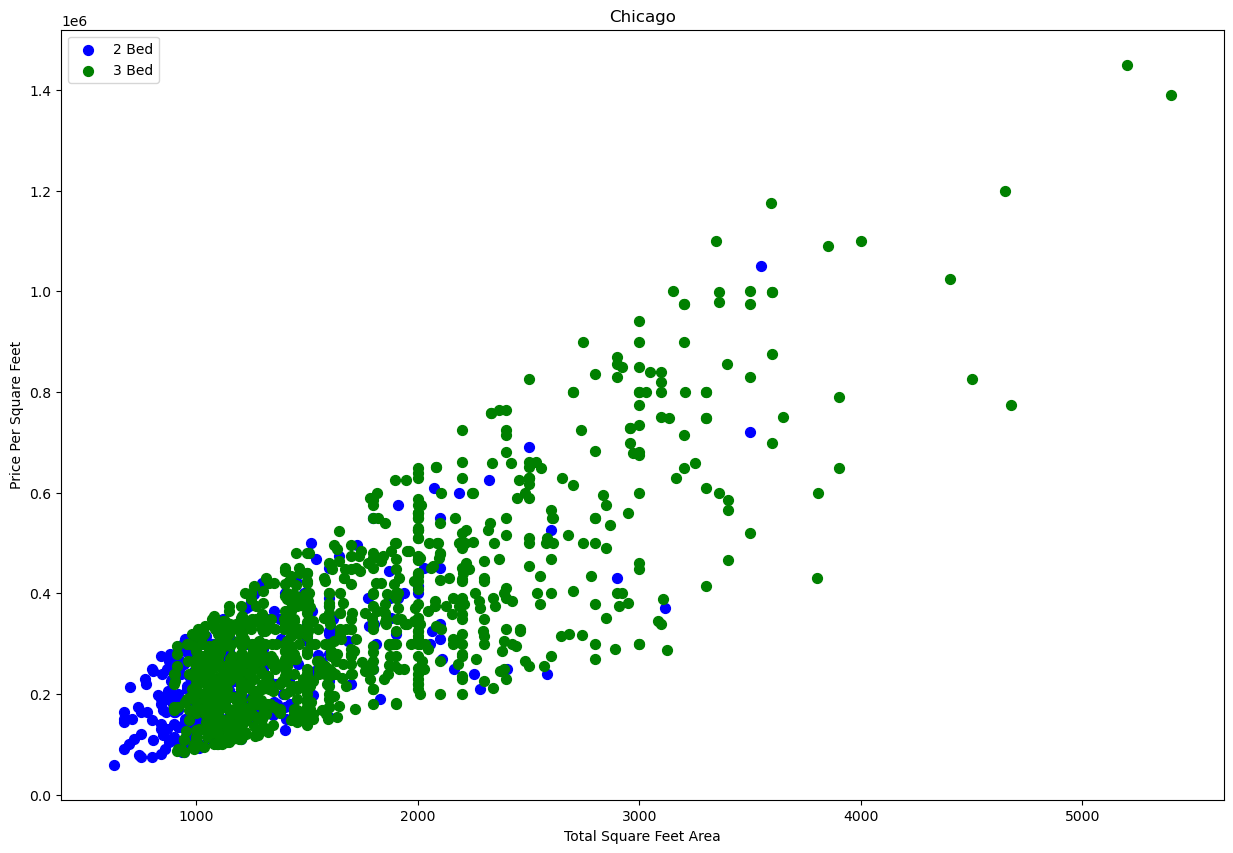

In [33]:
def plot_scatter_chart(re, city):
    bed2 = re[(re.city==city) & (re.bed==2)]
    bed3 = re[(re.city==city) & (re.bed==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.house_size,bed2.price,color='blue',label='2 Bed', s=50)
    plt.scatter(bed3.house_size,bed3.price,color='green',label='3 Bed', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(city)
    plt.legend()

plot_scatter_chart(re6, "Chicago")
    

In [34]:
def remove_bed_outliers(re):
    exclude_indices = np.array([])
    for city, city_re in re.groupby('city'):
        bed_stats = {}
        for bed, bed_re in city_re.groupby('bed'):
            bed_stats[bed] = {
                'mean': np.mean(bed_re.price_per_sqft),
                'std': np.std(bed_re.price_per_sqft),
                'count': bed_re.shape[0]
            }
        for bed, bed_re in city_re.groupby('bed'):
            stats = bed_stats.get(bed-1)
            if stats and stats ['count']>5:
                exclude_indices = np.append(exclude_indices, bed_re[bed_re.price_per_sqft<(stats['mean'])].index.values)
    return re.drop(exclude_indices, axis='index')

re7 = remove_bed_outliers(re6)
re7.shape

(247141, 8)

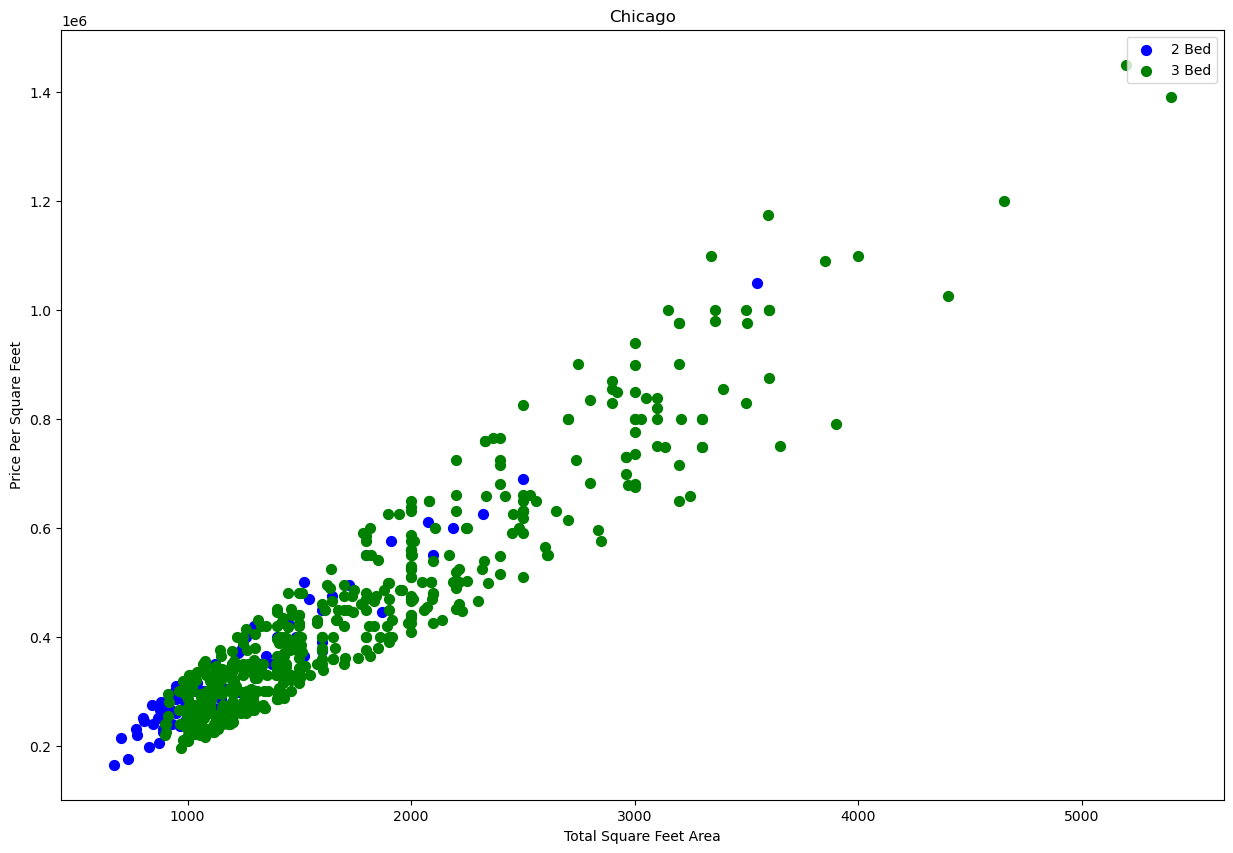

In [35]:
plot_scatter_chart(re7,"Chicago")

Text(0, 0.5, 'Count')

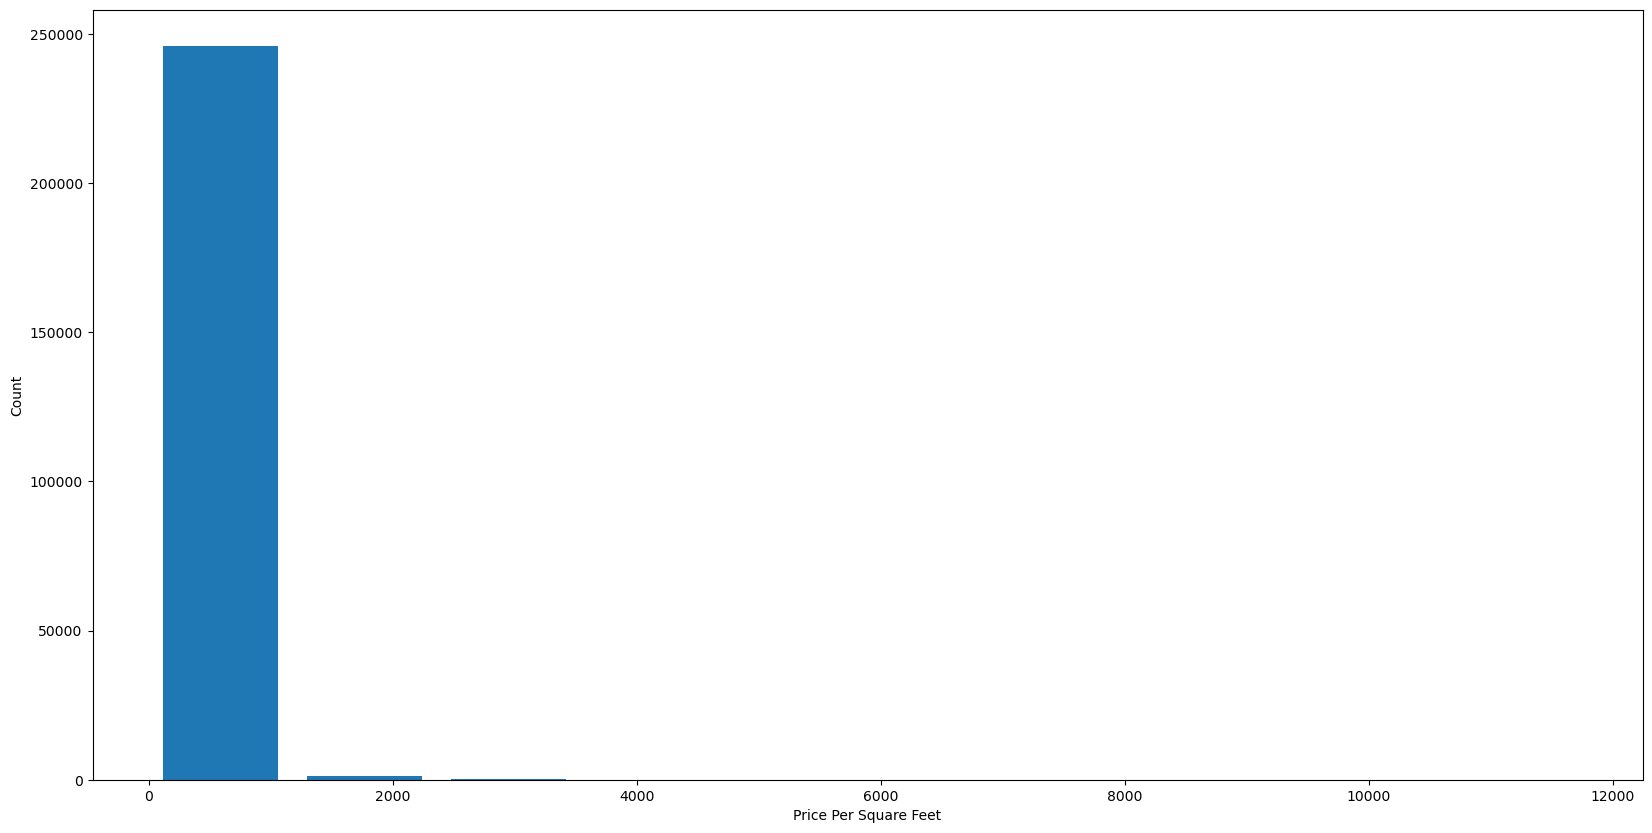

In [36]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(re7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [37]:
re7.bath.unique()

array([ 2.,  4.,  1.,  3.,  5.,  6.,  8.,  9.,  7., 15., 12., 10., 14.,
       13., 11., 25., 17., 18., 51., 16., 19., 24., 35., 20., 54., 21.,
       30., 38., 29., 22., 28., 44., 23., 80., 70., 64., 43., 56., 36.])

In [38]:
re7[re7.bath>10]

,price,bed,bath,acre_lot,city,state,house_size,price_per_sqft
1328,1500000.0,13.0,15.0,1.51,Aiken,South Carolina,12000.0,125.000000
2548,690000.0,12.0,12.0,0.06,Albany,New York,6032.0,114.389920
4530,1690000.0,17.0,14.0,0.15,Allentown,Pennsylvania,12214.0,138.365810
10935,4500000.0,7.0,13.0,12.90,Armonk,New York,11023.0,408.237322
10937,5789000.0,7.0,11.0,2.42,Armonk,New York,12827.0,451.313635
...,...,...,...,...,...,...,...,...
420897,2000000.0,19.0,15.0,3.82,other,Texas,11800.0,169.491525
420916,15200000.0,93.0,20.0,6.33,other,Texas,60000.0,253.333333
421032,1200000.0,33.0,30.0,80.00,other,Oklahoma,21800.0,55.045872
421193,2600000.0,27.0,20.0,3.50,other,Oklahoma,15000.0,173.333333


Text(0, 0.5, 'Count')

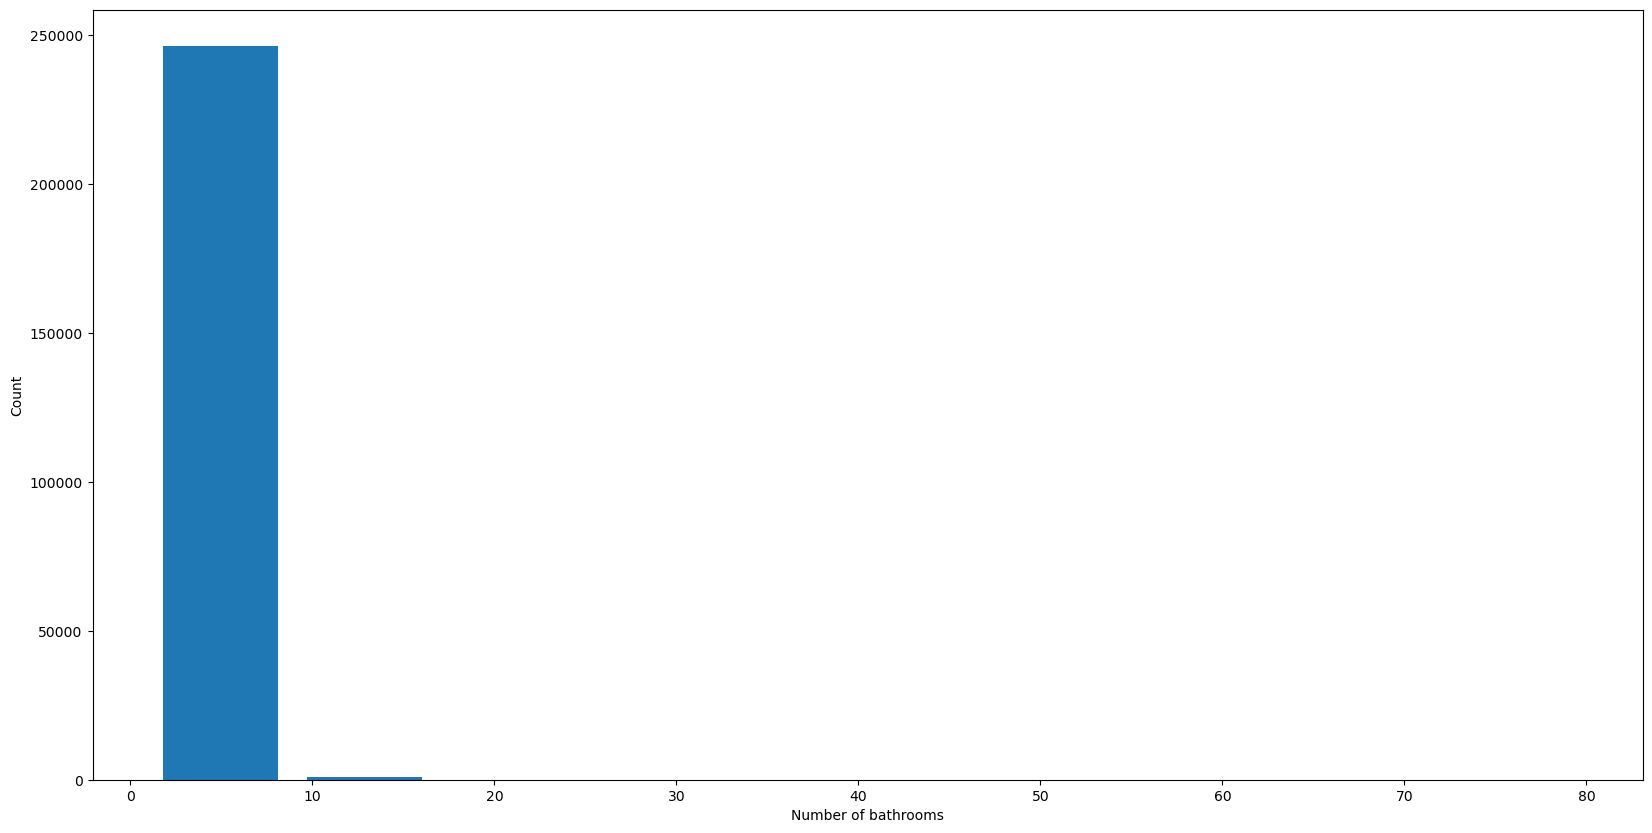

In [39]:
plt.hist(re7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
re7[re7.bath>re7.bed+2]

,price,bed,bath,acre_lot,city,state,house_size,price_per_sqft
498,1950000.0,6.0,9.0,0.82,Acworth,Georgia,10612.0,183.754240
544,1400000.0,5.0,8.0,0.61,Acworth,Georgia,7558.0,185.234189
566,2990000.0,6.0,9.0,5.74,Acworth,Georgia,12094.0,247.230031
1030,825000.0,3.0,7.0,0.26,Addison,Texas,3505.0,235.378031
1264,695000.0,6.0,9.0,1.50,Ahoskie,North Carolina,6600.0,105.303030
...,...,...,...,...,...,...,...,...
415661,1495000.0,5.0,8.0,3.00,other,Minnesota,5775.0,258.874459
416734,1375000.0,4.0,8.0,6.30,other,Illinois,5600.0,245.535714
416766,1399000.0,5.0,8.0,0.78,other,Illinois,6800.0,205.735294
418125,1320000.0,5.0,8.0,0.61,other,Missouri,6644.0,198.675497


In [41]:
re8 = re7[re7.bath<re7.bed+2]
re8.shape

(243796, 8)

In [42]:
re9 = re8.drop(['price_per_sqft'],axis='columns')
re9.head(3)

,price,bed,bath,acre_lot,city,state,house_size
0,299900.0,3.0,2.0,1.75,Abbeville,South Carolina,1772.0
1,165000.0,3.0,2.0,7.00,Abbeville,South Carolina,1216.0
3,350000.0,4.0,2.0,0.47,Abbeville,Alabama,2094.0


In [43]:
X = re9.drop('price',axis='columns')
X.head()

,bed,bath,acre_lot,city,state,house_size
0,3.0,2.0,1.75,Abbeville,South Carolina,1772.0
1,3.0,2.0,7.00,Abbeville,South Carolina,1216.0
3,4.0,2.0,0.47,Abbeville,Alabama,2094.0
5,4.0,2.0,0.46,Abbeville,Alabama,1440.0
6,3.0,2.0,1.00,Abbeville,Alabama,1344.0


In [44]:
y = re9.price
y.head()

0    299900.0
1    165000.0
3    350000.0
5    195000.0
6    144900.0
Name: price, dtype: float64

In [45]:
re10 = re9.drop(['city'],axis='columns')
re10.head(3)


,price,bed,bath,acre_lot,state,house_size
0,299900.0,3.0,2.0,1.75,South Carolina,1772.0
1,165000.0,3.0,2.0,7.00,South Carolina,1216.0
3,350000.0,4.0,2.0,0.47,Alabama,2094.0


In [46]:
re10.state = re10.state.apply(lambda x: x.strip())
state_stats = re10.groupby('state')['state'].agg('count').sort_values(ascending=False)
state_stats

state
Florida                 35860
New York                14178
Georgia                 12409
Pennsylvania            12373
Texas                   11984
Illinois                11098
North Carolina          10177
Ohio                     9964
Virginia                 9099
Michigan                 8183
Missouri                 7998
Tennessee                7635
Minnesota                7268
New Jersey               6919
South Carolina           6205
Maryland                 6045
Louisiana                5597
Oklahoma                 5584
Wisconsin                5335
Alabama                  4920
Indiana                  4830
Kentucky                 4793
Connecticut              4598
Arkansas                 4022
Iowa                     3550
Kansas                   3317
Massachusetts            3268
Mississippi              2693
Nebraska                 1763
Montana                  1743
West Virginia            1724
Delaware                 1544
Maine                    1165
Rhod

In [47]:
re10.head()

,price,bed,bath,acre_lot,state,house_size
0,299900.0,3.0,2.0,1.75,South Carolina,1772.0
1,165000.0,3.0,2.0,7.00,South Carolina,1216.0
3,350000.0,4.0,2.0,0.47,Alabama,2094.0
5,195000.0,4.0,2.0,0.46,Alabama,1440.0
6,144900.0,3.0,2.0,1.00,Alabama,1344.0


In [48]:
dummies = pd.get_dummies(re10.state, dtype='int')
dummies.head(3)

,Alabama,Arkansas,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Idaho,Illinois,...,South Carolina,South Dakota,Tennessee,Texas,Vermont,Virgin Islands,Virginia,West Virginia,Wisconsin,Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
re11 = pd.concat([re10,dummies],axis='columns')
re11.head()

,price,bed,bath,acre_lot,state,house_size,Alabama,Arkansas,Colorado,Connecticut,...,South Carolina,South Dakota,Tennessee,Texas,Vermont,Virgin Islands,Virginia,West Virginia,Wisconsin,Wyoming
0,299900.0,3.0,2.0,1.75,South Carolina,1772.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,165000.0,3.0,2.0,7.00,South Carolina,1216.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,350000.0,4.0,2.0,0.47,Alabama,2094.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,195000.0,4.0,2.0,0.46,Alabama,1440.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,144900.0,3.0,2.0,1.00,Alabama,1344.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
re12 = re11.drop('state',axis='columns')
re12.head()

,price,bed,bath,acre_lot,house_size,Alabama,Arkansas,Colorado,Connecticut,Delaware,...,South Carolina,South Dakota,Tennessee,Texas,Vermont,Virgin Islands,Virginia,West Virginia,Wisconsin,Wyoming
0,299900.0,3.0,2.0,1.75,1772.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,165000.0,3.0,2.0,7.00,1216.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,350000.0,4.0,2.0,0.47,2094.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,195000.0,4.0,2.0,0.46,1440.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,144900.0,3.0,2.0,1.00,1344.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
re12.shape

(243796, 49)

In [52]:
X = re12.drop('price',axis='columns')
X.head()

,bed,bath,acre_lot,house_size,Alabama,Arkansas,Colorado,Connecticut,Delaware,District of Columbia,...,South Carolina,South Dakota,Tennessee,Texas,Vermont,Virgin Islands,Virginia,West Virginia,Wisconsin,Wyoming
0,3.0,2.0,1.75,1772.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3.0,2.0,7.00,1216.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.0,2.0,0.47,2094.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.0,2.0,0.46,1440.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,2.0,1.00,1344.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y = re12.price
y.head()

0    299900.0
1    165000.0
3    350000.0
5    195000.0
6    144900.0
Name: price, dtype: float64

In [54]:
re13 = re9[re9['city']=='Philadelphia']

In [55]:
re13.shape

(1703, 7)

In [56]:
re13.head()

,price,bed,bath,acre_lot,city,state,house_size
282274,756169.0,3.0,3.0,0.02,Philadelphia,Pennsylvania,2408.0
282275,759900.0,4.0,4.0,0.02,Philadelphia,Pennsylvania,2629.0
282277,259900.0,2.0,3.0,0.04,Philadelphia,Pennsylvania,1140.0
282278,350000.0,2.0,2.0,0.07,Philadelphia,Pennsylvania,1501.0
282280,380000.0,3.0,2.0,0.04,Philadelphia,Pennsylvania,1554.0


In [57]:
re14 = re13.drop('state',axis='columns')
re14.head()

,price,bed,bath,acre_lot,city,house_size
282274,756169.0,3.0,3.0,0.02,Philadelphia,2408.0
282275,759900.0,4.0,4.0,0.02,Philadelphia,2629.0
282277,259900.0,2.0,3.0,0.04,Philadelphia,1140.0
282278,350000.0,2.0,2.0,0.07,Philadelphia,1501.0
282280,380000.0,3.0,2.0,0.04,Philadelphia,1554.0


In [58]:
dummiesP = pd.get_dummies(re14.city, dtype='int')
dummiesP.head()

,Philadelphia
282274,1
282275,1
282277,1
282278,1
282280,1


In [59]:
re15 = pd.concat([re14,dummiesP],axis='columns')
re15.head()

,price,bed,bath,acre_lot,city,house_size,Philadelphia
282274,756169.0,3.0,3.0,0.02,Philadelphia,2408.0,1
282275,759900.0,4.0,4.0,0.02,Philadelphia,2629.0,1
282277,259900.0,2.0,3.0,0.04,Philadelphia,1140.0,1
282278,350000.0,2.0,2.0,0.07,Philadelphia,1501.0,1
282280,380000.0,3.0,2.0,0.04,Philadelphia,1554.0,1


In [60]:
re16 = re15.drop('city',axis='columns')
re16.head()

,price,bed,bath,acre_lot,house_size,Philadelphia
282274,756169.0,3.0,3.0,0.02,2408.0,1
282275,759900.0,4.0,4.0,0.02,2629.0,1
282277,259900.0,2.0,3.0,0.04,1140.0,1
282278,350000.0,2.0,2.0,0.07,1501.0,1
282280,380000.0,3.0,2.0,0.04,1554.0,1


In [61]:
re16.head()

,price,bed,bath,acre_lot,house_size,Philadelphia
282274,756169.0,3.0,3.0,0.02,2408.0,1
282275,759900.0,4.0,4.0,0.02,2629.0,1
282277,259900.0,2.0,3.0,0.04,1140.0,1
282278,350000.0,2.0,2.0,0.07,1501.0,1
282280,380000.0,3.0,2.0,0.04,1554.0,1


In [62]:
re16.shape

(1703, 6)

In [63]:
X = re16.drop('price',axis='columns')
X.head()

,bed,bath,acre_lot,house_size,Philadelphia
282274,3.0,3.0,0.02,2408.0,1
282275,4.0,4.0,0.02,2629.0,1
282277,2.0,3.0,0.04,1140.0,1
282278,2.0,2.0,0.07,1501.0,1
282280,3.0,2.0,0.04,1554.0,1


In [64]:
y = re16.price
y.head()

282274    756169.0
282275    759900.0
282277    259900.0
282278    350000.0
282280    380000.0
Name: price, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9068376411956429

In [67]:
def price_predict(bed, bath, acre_lot, house_size, city='Philadelphia'):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'bed': [bed],
        'bath': [bath],
        'acre_lot': [acre_lot],
        'house_size': [house_size],
        'city': [city]
    })

    # Generate dummy variables for the 'city' column
    dummiesP = pd.get_dummies(input_data['city'], dtype='int')
    
    # Drop the original 'city' column and join with the dummies
    input_data = input_data.drop('city', axis=1).join(dummiesP)

    # Ensure that the 'Philadelphia' column is present
    if 'Philadelphia' not in input_data.columns:
        input_data['Philadelphia'] = 0
    
    # Reorder the columns to match the training data
    feature_order = ['bed', 'bath', 'acre_lot', 'house_size', 'Philadelphia']
    X = input_data[feature_order]

    # Use the trained model to predict the price
    predicted_price = lr_clf.predict(X)[0]
    
    return predicted_price

# Example usage:
predicted_price = price_predict(3, 2, 1.5, 2000)
print(f"Predicted Price: ${predicted_price}")

Predicted Price: $518464.35810251


In [68]:
price_predict(3,2,1.5,2000)

518464.35810251

In [69]:
import pickle
with open('Philadelphia_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [70]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columnsPhilly.json","w") as f:
    f.write(json.dumps(columns))

In [71]:
price_predict(3,2,1,1800)

464885.4642977551

In [72]:
price_predict(6,6,5,4000)

1016280.1552018847

In [73]:
price_predict(2,1,.25,700)


187644.66826142863

In [100]:
def plot_scatter_chart(re):
    # Filter based on number of bedrooms
    bed2 = re[re.bed == 2]
    bed3 = re[re.bed == 3]
    bed4 = re[re.bed == 4]

    # Set the figure size
    matplotlib.rcParams['figure.figsize'] = (12,8)

    # Create scatter plot for 2-bed and 3-bed houses
    plt.scatter(bed2.house_size, bed2.price, color='blue', label='2 Bed', s=50)
    plt.scatter(bed3.house_size, bed3.price, color='green', label='3 Bed', s=50)
    plt.scatter(bed4.house_size, bed4.price, color='red', label='4 Bed', s=50)

    # Set labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title("Philadelphia Housing Chart)")

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

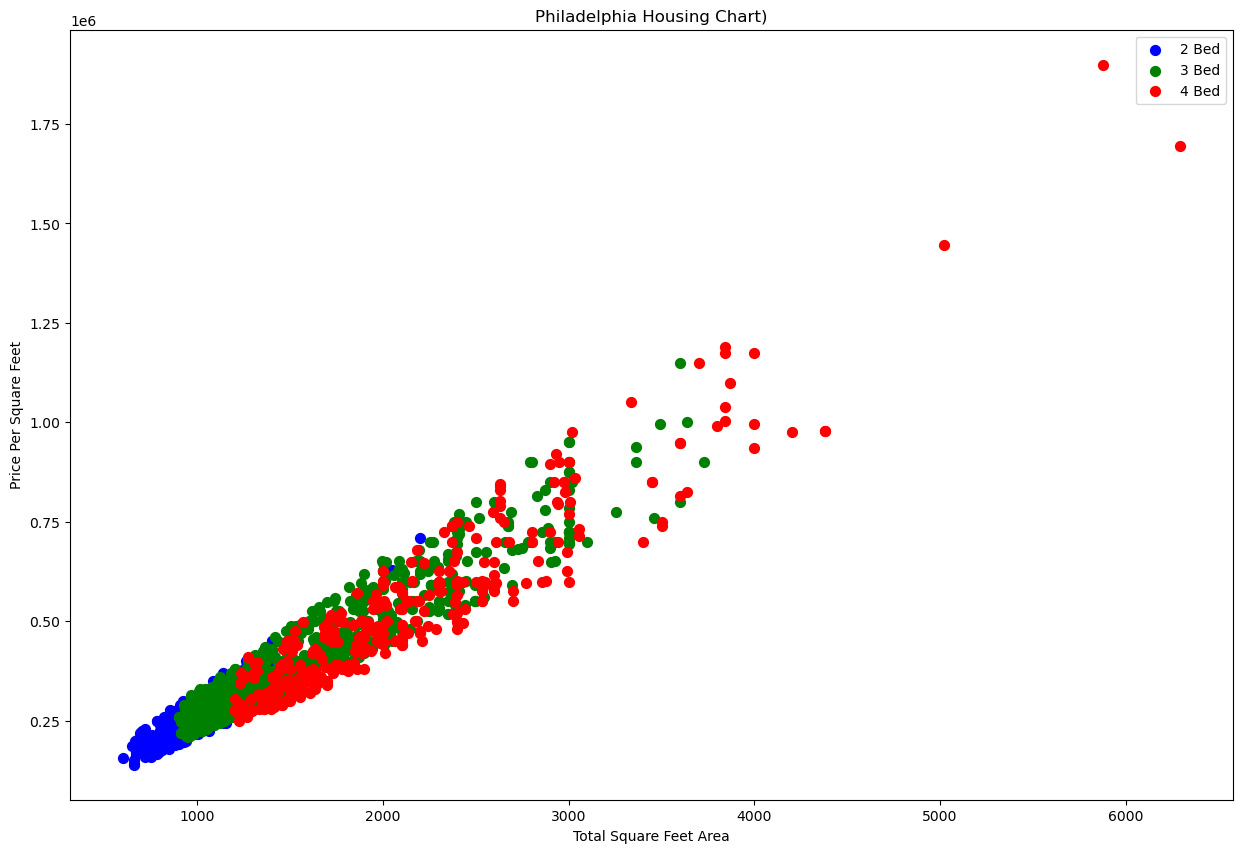

In [75]:
plot_scatter_chart(re16)

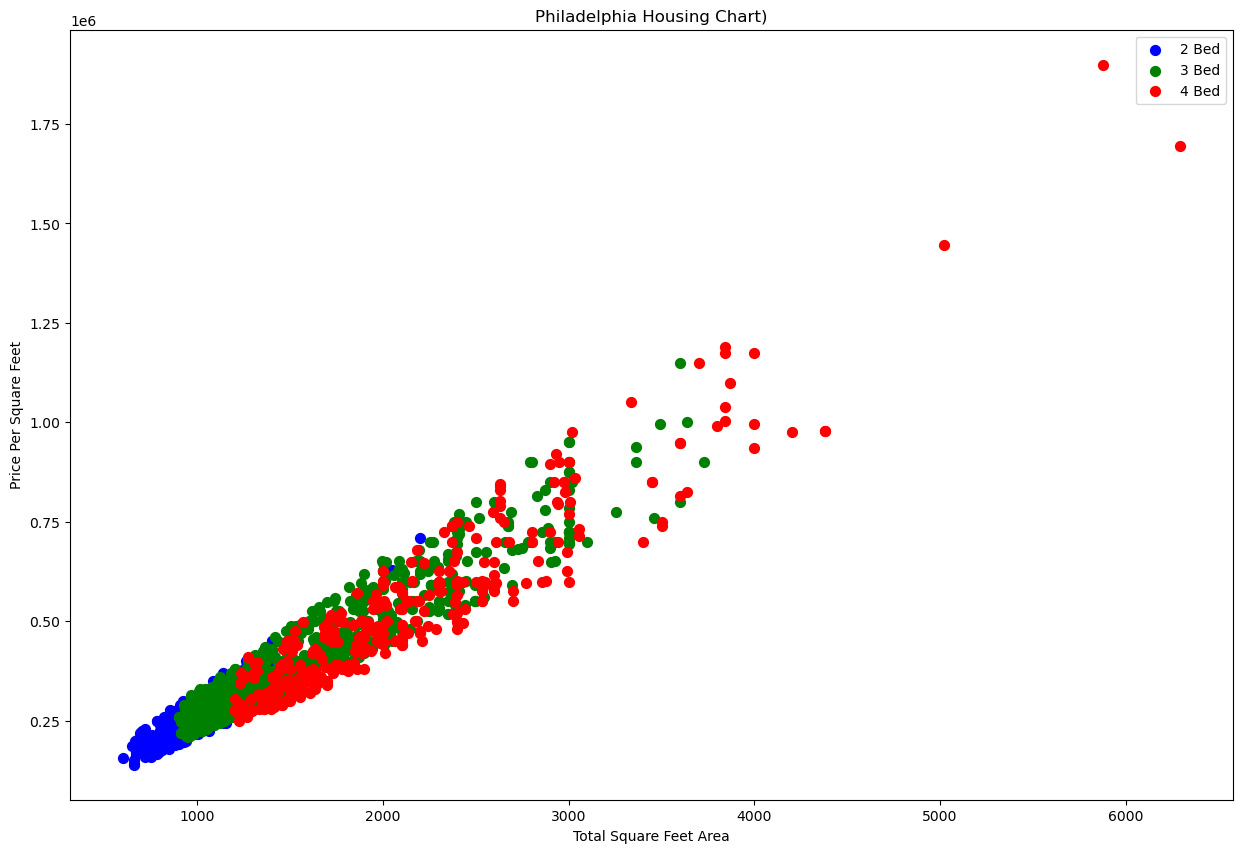

In [76]:
plot_scatter_chart(re16)

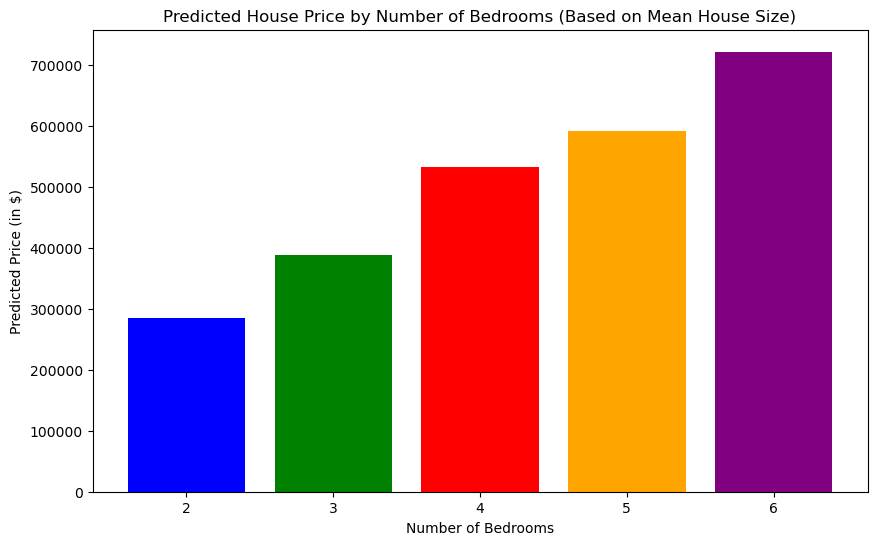

In [88]:
# Assume 're' is the DataFrame containing the housing data
# Calculate the mean house size for each bedroom count, filtered to stop at 6 bedrooms
mean_house_size_per_bed = re16[(re16['bed'] >= 2) & (re['bed'] <= 6)].groupby('bed')['house_size'].mean()

# Predict house prices based on the mean house size for each bedroom count
bedroom_counts = mean_house_size_per_bed.index
predicted_prices = []

# Fixed parameters for bath and acre_lot
bath = 2
acre_lot = 0.2

# Generate predictions for each bedroom count based on mean house size
for bed in bedroom_counts:
    mean_house_size = mean_house_size_per_bed[bed]
    predicted_price = price_predict(bed, bath, acre_lot, mean_house_size)
    predicted_prices.append(predicted_price)

# Define custom colors for each bedroom size
bar_colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(bedroom_counts, predicted_prices, color=bar_colors[:len(bedroom_counts)])

# Set labels and title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Predicted Price (in $)")
plt.title("Predicted House Price by Number of Bedrooms (Based on Mean House Size)")

# Display the plot
plt.show()

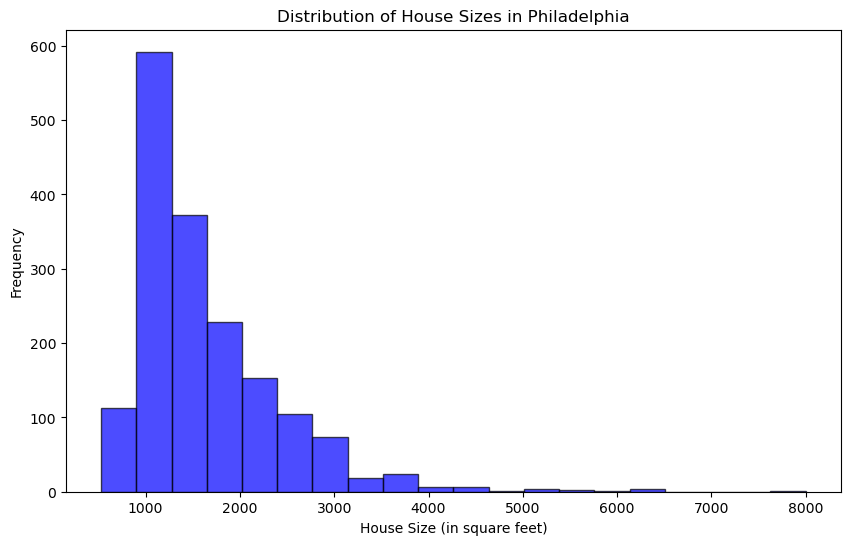

In [90]:
# Extract the house_size column
house_sizes = re16['house_size']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(house_sizes, bins=20, color='blue', edgecolor='black', alpha=0.7)

# Set labels and title
plt.xlabel("House Size (in square feet)")
plt.ylabel("Frequency")
plt.title("Distribution of House Sizes in Philadelphia")

# Display the plot
plt.show()

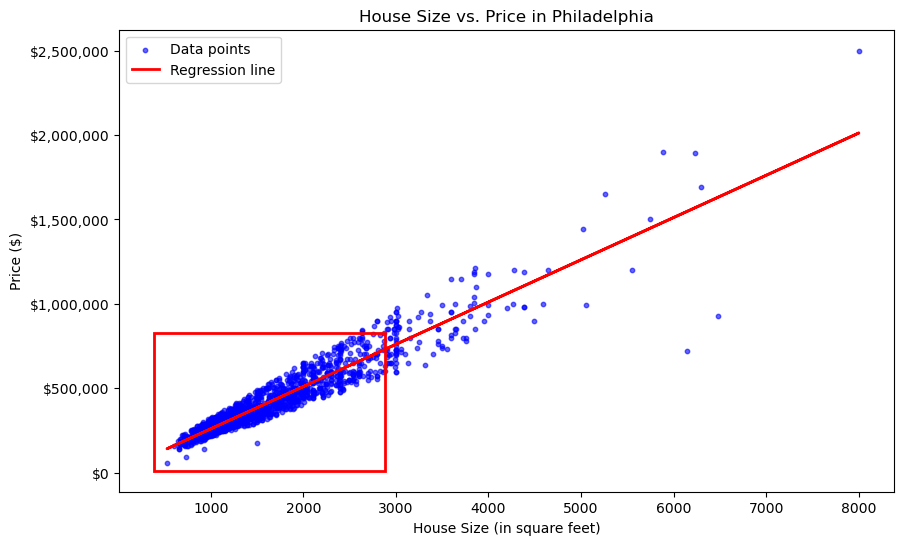

In [96]:
import matplotlib.patches as patches
from matplotlib.ticker import FuncFormatter

# Data
house_sizes = re16['house_size'].values.reshape(-1, 1)
prices = re16['price'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(house_sizes, prices)
predicted_prices = model.predict(house_sizes)

# Plot the scatter chart
plt.figure(figsize=(10, 6))
plt.scatter(house_sizes, prices, color='blue', s=10, alpha=0.6, label='Data points')  # Dots smaller

# Plot the regression line
plt.plot(house_sizes, predicted_prices, color='red', linewidth=2, label='Regression line')

# Set labels and title
plt.xlabel("House Size (in square feet)")
plt.ylabel("Price ($)")
plt.title("House Size vs. Price in Philadelphia")

# Add a rectangular box around the center of the data
# Define the coordinates and size of the box
center_x = house_sizes.mean()  # Center based on mean house size
center_y = prices.mean()       # Center based on mean price
width = (house_sizes.max() - house_sizes.min()) / 3  # Width of the box
height = (prices.max() - prices.min()) / 3           # Height of the box

# Create the rectangle patch and add it to the plot
rect = patches.Rectangle((center_x - width/2, center_y - height/2), width, height, 
                         linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

# Format y-axis ticks as dollars
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Add legend
plt.legend()

# Display the plot
plt.show()